In [14]:
import pandas as pd
import numpy as np
from gensim.models import word2vec

In [6]:
file_name = 'train_querylist_writefile-1w.csv'
cur_model = gensim.models.Word2Vec.load('20w_size_win100_300.model')
with open(file_name, 'r') as f:
    cur_index = 0
    lines = f.readlines()
    doc_cev = np.zeros((len(lines),300))
    for line in lines:
        word_vec = np.zeros((1,300))
        words = line.strip().split(' ')
        wrod_num = 0
        for word in words:
            if word in cur_model:
                wrod_num += 1
                word_vec += np.array([cur_model[word]])
        doc_cev[cur_index] = word_vec / float(wrod_num)
        cur_index += 1

In [7]:
doc_cev.shape

(9988, 300)

In [9]:
doc_cev[5]

array([ 0.33182368,  0.55252966,  0.63669818,  0.00209563,  0.05348139,
       -0.19718801,  0.0736446 ,  0.32822171,  0.18450843,  0.53490043,
        0.16007615,  0.01593239, -0.75761003, -0.20746806, -0.22237793,
       -0.34965017, -0.06830732,  0.03833664, -0.41728927, -0.49847602,
       -0.15014577,  0.36489224, -0.01786399,  0.43068594, -0.03712102,
       -0.15087827, -0.37784922,  0.36978041, -0.50218117,  0.02682012,
       -0.52849729, -0.28924009,  0.61358333, -0.34677243, -0.09515623,
       -0.15804055,  0.30000075, -0.19565529,  0.37209247, -0.63398634,
       -0.2731103 , -0.26805587,  0.11133715,  0.44562418, -0.00714147,
       -0.57793753,  0.06985141,  0.24699661, -0.16827831,  0.0693375 ,
       -0.26619998,  0.25219051,  0.20520646, -0.54850182,  0.49025904,
        0.26579061, -0.13549178,  0.19110944, -0.08072405,  0.15693008,
        0.32124069,  0.1143565 , -0.27793777, -0.21445868,  0.13913571,
       -0.37103528, -0.56686346, -0.1686514 , -0.14588745,  0.46

In [10]:
genderlabel = np.loadtxt(open('train_gender.csv', 'r')).astype(int)
genderlabel.shape

(9988,)

In [11]:
def removezero(x, y):
        nozero = np.nonzero(y)
        y = y[nozero]
        x = np.array(x)
        x = x[nozero]
        return x, y
gender_train, genderlabel = removezero(doc_cev, genderlabel)
print (gender_train.shape,genderlabel.shape)

(9756, 300) (9756,)


In [12]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.79868798688
Recall metric in the testing dataset:  0.805637982196
accuracy metric in the testing dataset:  0.79868798688


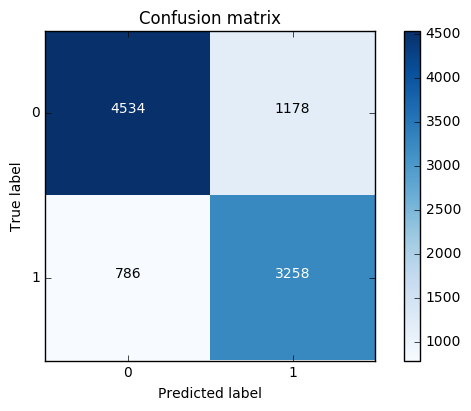

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(class_weight='balanced', random_state=0,penalty='l1')

LR_model.fit(gender_train,genderlabel)
y_pred = LR_model.predict(gender_train)
print (LR_model.score(gender_train,genderlabel))
cnf_matrix = confusion_matrix(genderlabel,y_pred)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("accuracy metric in the testing dataset: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()